In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from numpy import fft

from IPython.html import widgets

%matplotlib inline

## Image Processing in OpenCV
- [resource](http://docs.opencv.org/trunk/doc/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html#py-table-of-content-imgproc)

## Topic: Template Matching
- `cv2.matchTemplate()`: It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image.
- Once you got the result, you can use `cv2.minMaxLoc()` function to find where is the maximum/minimum value. Take it as the top-left corner of rectangle and take (w,h) as width and height of the rectangle. That rectangle is your region of template.
-  If you are using `cv2.TM_SQDIFF` as comparison method, minimum value gives the best match.

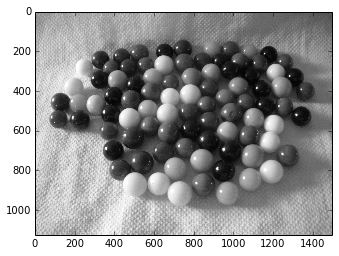

In [2]:
marbles = cv2.imread("public-images/marbles.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(marbles, cmap = plt.cm.gray)

950 471


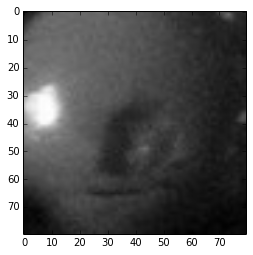

In [25]:
c, r, b = 990, 511, 40
roi = marbles[r-b:r+b, c-b:c+b]
plt.imshow(roi, cmap = plt.cm.gray)
print c-b, r-b

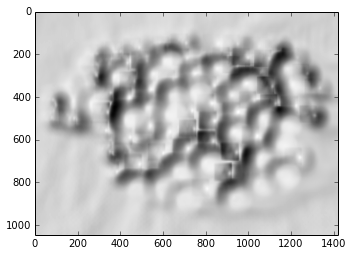

In [21]:
locations = cv2.matchTemplate(marbles, roi, cv2.TM_CCORR_NORMED)
plt.imshow(locations, cmap = plt.cm.gray)

In [24]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(locations)
x, y = max_loc
print x, y
matched_img = cv2.rectangle(marbles.copy(), (x, y), (x+2*b, y+2*b), thickness = 5, color = 255)

950 471


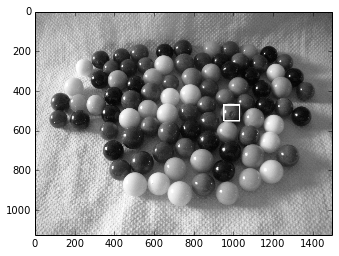

In [23]:
plt.imshow(matched_img, cmap = plt.cm.gray)